# Bike Store sales

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
sales=pd.read_csv('Machine Learning/data/sales_data.csv')

In [15]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


<h3>calculating mean of the customers</h3>

In [19]:
sales['Customer_Age'].mean()    

36.173576981503

<p>.mean() used to calculate mean of specific coloumn or row</p>

<AxesSubplot:ylabel='Density'>

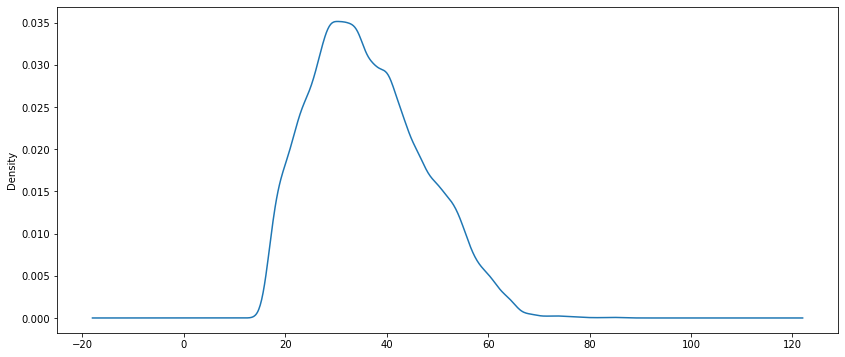

In [20]:
sales['Customer_Age'].plot(kind='kde',figsize=(14,6))

<p>Above graph is probability density function of parameter Age. designed using desity(KDE)</p>

<AxesSubplot:>

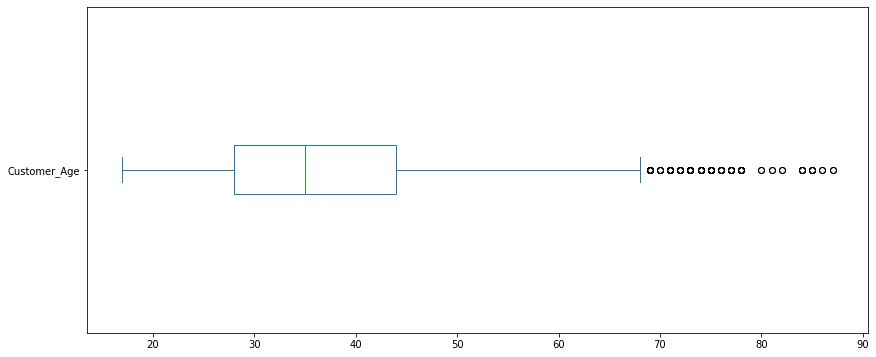

In [21]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

<p>A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”)</p>

<h3>Let's visualize the mean of ordered Quantity</p>

In [22]:
sales['Order_Quantity'].mean()

14.936599423631124

<p>lets see the histogram and box plot of the same</p>

<AxesSubplot:ylabel='Frequency'>

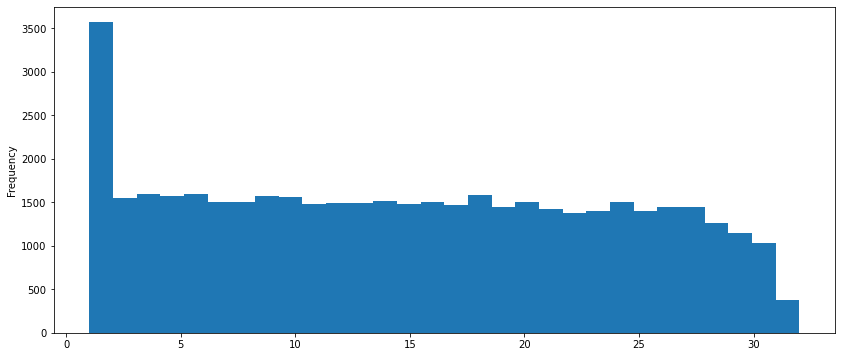

In [23]:
sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14,6))

<AxesSubplot:>

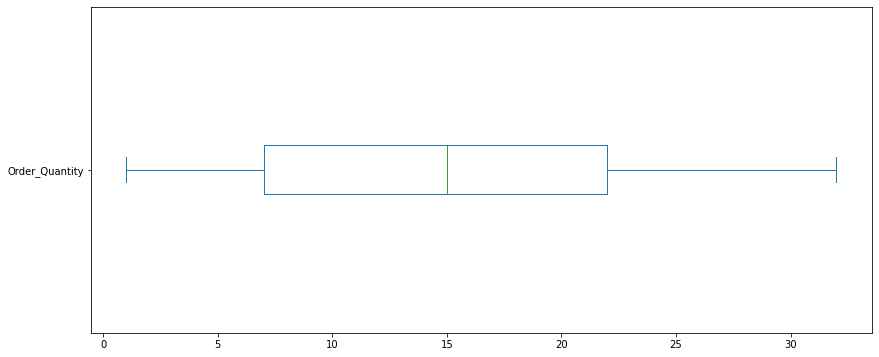

In [24]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

<h3> How many sales in a year do we have</h3>

In [25]:
sales['Year'].value_counts()

2014    12821
2016    12821
2013     9561
2015     9561
Name: Year, dtype: int64

<p> .value_counts() in uses to group same objects and calculate the count. Same as in COUNT in SQL</p>

###### lets see pie plot

<AxesSubplot:ylabel='Year'>

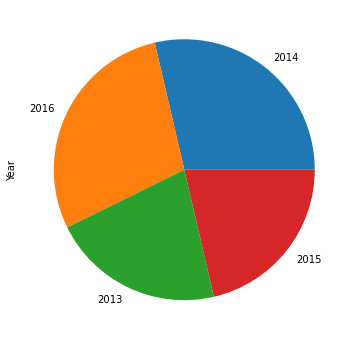

In [26]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

###### lets see bar graph with the same data.

<AxesSubplot:>

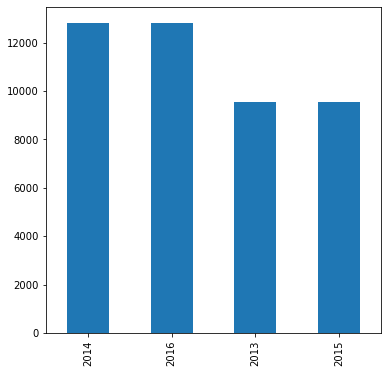

In [27]:
sales['Year'].value_counts().plot(kind='bar', figsize=(6,6))

### Create a list of every product sold

In [28]:
#sales.loc[:, 'Product'].unique() 

sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', nan], dtype=object)

###### create a bar plot of 10 most selling bikes

<AxesSubplot:>

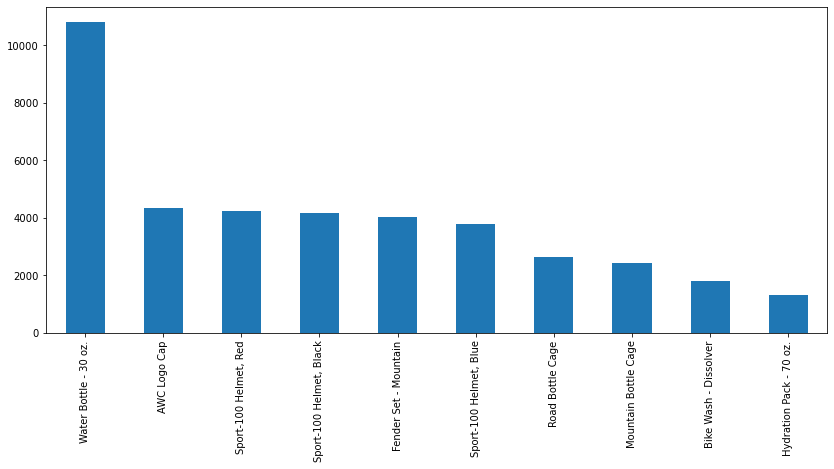

In [31]:
sales['Product'].value_counts().head(10).plot(kind='bar',figsize=(14,6))

### Can u see any relationship between Order Quantity and Profit?

###### lets see a scatter plot between them

<AxesSubplot:xlabel='Unit_Cost', ylabel='Unit_Price'>

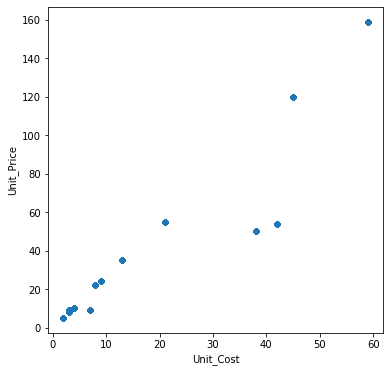

In [33]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))

<p>Unit_Cost and Unit_Price are the two coloumns and with the help of scatter we can see the relationship between them.</p>

### Relationship between Customer Age per Country

<AxesSubplot:title={'center':'Customer_Age'}, xlabel='[Country]'>

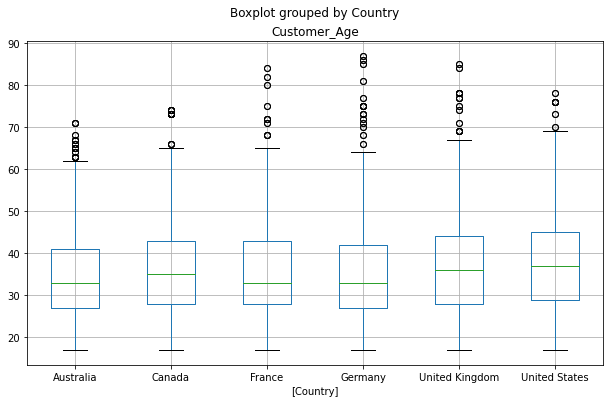

In [34]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

<p> we created the box plot per countries with the customer age values</p>

### Add and calculate a new Calculated_Date column

<p>Use Day, Month, Year to create a Date column (YYYY-MM-DD).</p>

In [38]:
sales['Calculated_Date'] = sales[['Year','Month','Day']].apply(lambda x: '{}-{}-{}'.format(x[0],x[1],x[2]),axis=1)
sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

### Parse your Calculated_Date coloumn into a datetime object

In [40]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

In [41]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,2013-11-26
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,2015-11-26
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0,2014-03-23
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0,2016-03-23
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0,2014-05-15


### How does sales evolves through years?

lets see the line plot of count of sales in years so far.

<AxesSubplot:>

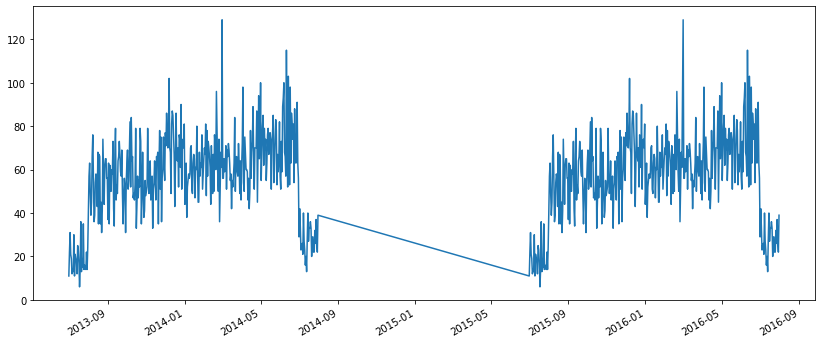

In [42]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))

### Increase 50 rupees to every sale

In [43]:
sales['Revenue']+=50

### Count of orders made in canada and france

In [53]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

10258

shape[0] represents number of rows. shape[1] will return number of columns.

### How many orders were made in each region (state) of France?

In [54]:
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()
france_states

Seine (Paris)        844
Seine Saint Denis    620
Nord                 568
Hauts de Seine       424
Essonne              386
Yveline              346
Moselle              148
Loiret               140
Seine et Marne       140
Val d'Oise            96
Val de Marne          70
Garonne (Haute)       70
Charente-Maritime     64
Loir et Cher          56
Somme                 54
Pas de Calais         38
Name: State, dtype: int64

.loc[a,b] - a is for rows and b is for columns.

### Which gender has most amount of sales?

lets see with help of bar graph

In [55]:
sales['Customer_Gender'].value_counts()

M    23136
F    21628
Name: Customer_Gender, dtype: int64

<AxesSubplot:>

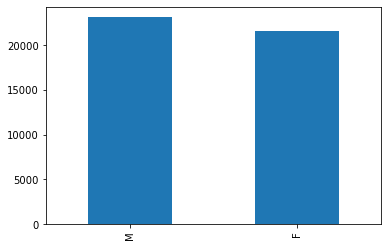

In [56]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

### Get top 5 sales with the highest revenue

In [57]:
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
245,2016-01-07,7,January,2016,31,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,30.0,45.0,120.0,2214.0,1350.0,3614.0,2016-01-07
90,2014-02-12,12,February,2014,46,Adults (35-64),M,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,30.0,45.0,120.0,2178.0,1350.0,3578.0,2014-02-12
182,2014-01-17,17,January,2014,53,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,30.0,45.0,120.0,2178.0,1350.0,3578.0,2014-01-17
244,2014-01-07,7,January,2014,31,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,29.0,45.0,120.0,2140.0,1305.0,3495.0,2014-01-07
183,2016-01-17,17,January,2016,53,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,29.0,45.0,120.0,2105.0,1305.0,3460.0,2016-01-17


generally .sort_values() sorts in ascending order. but with ascending=False. it sorts in descending order.

### Mean of ordered_quantity of orders with more than 1K in revenue?

In [63]:
cond = sales['Revenue'] > 1000
sales.loc[cond,'Order_Quantity'].mean()

23.85279805352798

### How many orders were made between May and June 2016.

In [64]:
cond=(sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))


In [65]:
profit=sales.loc[cond,['Profit','Month']]

show a grouped box plot per month with the profit values.

<AxesSubplot:title={'center':'Profit'}, xlabel='[Month]'>

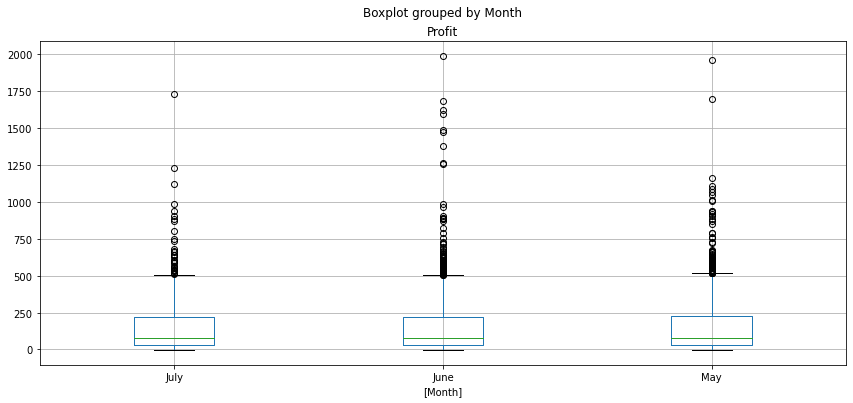

In [66]:
profit.boxplot(by='Month',figsize=(14,6))

### Add 7.2% TAX on every sale Unit_Price within United States

In [74]:
sales.loc[sales['Country']=='United States','Unit_Price'].head()

22    275.80416
23    275.80416
34    275.80416
35    275.80416
38    275.80416
Name: Unit_Price, dtype: float64

In [75]:
sales.loc[sales['Country']=='United States','Unit_Price']*=1.072

In [76]:
sales.loc[sales['Country']=='United States','Unit_Price'].head()

22    295.66206
23    295.66206
34    295.66206
35    295.66206
38    295.66206
Name: Unit_Price, dtype: float64

U can see the difference between the values befeore and after.